In [2]:
# seccion de importaciones
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

In [3]:
plt.style.use('ggplot')
pd.option_context('display.max_rows', None, 'display.max_columns', 3)

In [4]:
# obtiene los datos
df = pd.read_csv('flavors_of_cacao.csv', encoding = 'utf8')

In [5]:
# inspecciones breves
# Bean Type tiene casillas vacias
df.head(10)

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,A. Morin,Sur del Lago,1315,2014,70%,France,3.50,Criollo,Venezuela
8,A. Morin,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru


In [6]:
df.iloc[len(df) // 4:len(df) // 2, :]

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
448,Coppeneur,Ghana Puristique,813,2012,85%,Germany,3.50,Forastero,Ghana
449,Coppeneur,Ecuador Puristique,817,2012,100%,Germany,1.50,,Ecuador
450,Coppeneur,Uba Budo,821,2012,72%,Germany,3.75,Forastero,Sao Tome & Principe
451,Coppeneur,Madagascar,959,2012,70%,Germany,3.50,Trinitario,Madagascar
452,Coppeneur,Grenada,470,2010,72%,Germany,3.25,Trinitario,Grenada
453,Coppeneur,Chuao,478,2010,70%,Germany,3.00,Trinitario,Venezuela
454,Coppeneur,"Los Rios, H. Iara",558,2010,72%,Germany,2.50,Nacional,Ecuador
455,Coppeneur,Trinidad,558,2010,72%,Germany,3.00,Trinitario,Trinidad
456,Coppeneur,Jamaica,558,2010,72%,Germany,3.25,Trinitario,Jamaica
457,Coppeneur,Ocumare 61,558,2010,72%,Germany,3.25,Criollo (Ocumare 61),Venezuela


In [7]:
df.tail(10)

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
1785,Zotter,Huiwani Coop,879,2012,75%,Austria,3.00,"Criollo, Trinitario",Papua New Guinea
1786,Zotter,El Ceibo Coop,879,2012,90%,Austria,3.25,,Bolivia
1787,Zotter,Santo Domingo,879,2012,70%,Austria,3.75,,Dominican Republic
1788,Zotter,"Kongo, Highlands",883,2012,68%,Austria,3.25,Forastero,Congo
1789,Zotter,"Indianer, Raw",883,2012,58%,Austria,3.50,,
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India
1794,Zotter,"Brazil, Mitzi Blue",486,2010,65%,Austria,3.00,,Brazil


In [8]:
df.shape

(1795, 9)

In [9]:
# del ultimo tail sabemos que la posicion 1787 tiene ese valor faltante (caracter extraño)
non_char = df.iloc[1787, 7]
non_char

'\xa0'

In [10]:
# revolvemos los datos para un manejo menos sesgado (get 100% sample fraction in random order)
df = df.sample(frac=1) 

In [11]:
# cambiaremos algunos nombres para una manipulacion mas sencilla
df.columns

Index(['Company \n(Maker-if known)', 'Specific Bean Origin\nor Bar Name',
       'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating',
       'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')

In [12]:
df.columns = df.columns.str.replace('\s+|\n', '_')
df = df.rename(columns = {'Company_(Maker-if_known)':'Maker',
                          'Specific_Bean_Origin_or_Bar_Name':'Specific_Origin',
                         'Broad_Bean_Origin':'Broad_Origin'})
df.columns = df.columns.str.lower()
df.columns

Index(['maker', 'specific_origin', 'ref', 'review_date', 'cocoa_percent',
       'company_location', 'rating', 'bean_type', 'broad_origin'],
      dtype='object')

In [13]:
# bean_type a pesar de tener nulos no se representan como tal
df.isnull()

,maker,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
863,False,False,False,False,False,False,False,False,False
1004,False,False,False,False,False,False,False,False,False
1202,False,False,False,False,False,False,False,False,False
1633,False,False,False,False,False,False,False,False,False
1599,False,False,False,False,False,False,False,False,False
1337,False,False,False,False,False,False,False,False,False
330,False,False,False,False,False,False,False,False,False
1355,False,False,False,False,False,False,False,False,False
439,False,False,False,False,False,False,False,False,False
1451,False,False,False,False,False,False,False,False,False


In [14]:
# reemplazamos ese valor por el tipo nulo para llenarlos despues
df.replace(non_char, np.nan, inplace=True)

In [15]:
df.head(10)

,maker,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
863,Idilio (Felchlin),"Carenero Superior, Urrutia, Barlovento",737,2011,70%,Switzerland,4.00,Trinitario,Venezuela
1004,Madre,"Chiapas, Triple Cacao",607,2010,72%,U.S.A.,2.75,NaN,Mexico
1202,Ocelot,Virunga,1558,2015,70%,Scotland,3.75,Forastero,Congo
1633,Tejas,Presidio,805,2012,70%,U.S.A.,3.50,NaN,Dominican Republic
1599,Szanto Tibor,"Fazenda Sempre Firme, Bahia",1708,2015,70%,Hungary,3.50,Forastero (Parazinho),Brazil
1337,Pralus,"Caracas, Venezuela and Ghana",99,2006,75%,France,3.00,"Trinitario, Forastero","Venezuela, Ghana"
330,C-Amaro,Ecuador,1185,2013,100%,Italy,3.50,NaN,Ecuador
1355,Quetzalli (Wolter),"Uranga, Lot 22032016",1800,2016,74%,Mexico,3.00,Trinitario,Mexico
439,Coleman & Davis,Sambirano,1646,2015,75%,U.S.A.,3.00,Trinitario,Madagascar
1451,Shark Mountain,"Belize, 2013",1335,2014,72%,U.S.A.,3.25,"Criollo, Trinitario",Belize


## DATA TYPES

In [16]:
# obtenemos los registros que no son numericos para transformalos
df['cocoa_percent'] = df['cocoa_percent'].apply(lambda percent : float(percent.strip('%')))
df_types = np.array(list(map(str, df.dtypes.values)))
str_columns = list(df.columns[np.where(df_types == 'object')])
str_columns

['maker', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']

In [17]:
for column in str_columns:
    df[column] = df[column].str.lower()

In [18]:
# no es conveniente eliminar los rengloes con Bean_Type nulos ya que se perderia la mayoria de los registros
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1795 entries, 863 to 1501
Data columns (total 9 columns):
maker               1795 non-null object
specific_origin     1795 non-null object
ref                 1795 non-null int64
review_date         1795 non-null int64
cocoa_percent       1795 non-null float64
company_location    1795 non-null object
rating              1795 non-null float64
bean_type           907 non-null object
broad_origin        1721 non-null object
dtypes: float64(2), int64(2), object(5)
memory usage: 140.2+ KB


In [19]:
# maker y specific_origin tienen muchos valores unicos a comparacion del total para ser valores discretos
df.describe(include=['object'])

,maker,specific_origin,company_location,bean_type,broad_origin
count,1795,1795,1795,907,1721
unique,416,1038,60,40,99
top,soma,madagascar,u.s.a.,trinitario,venezuela
freq,47,57,764,419,214


In [20]:
df = df.fillna('unknown')

In [21]:
# la mayoria de los bean_type no se incluyeron
df.describe(include=['object'])

,maker,specific_origin,company_location,bean_type,broad_origin
count,1795,1795,1795,1795,1795
unique,416,1038,60,41,100
top,soma,madagascar,u.s.a.,unknown,venezuela
freq,47,57,764,888,214


In [22]:
df.describe(include=['int', 'float'])

,ref,review_date,cocoa_percent,rating
count,1795.000000,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,71.698329,3.185933
std,552.886365,2.927210,6.323118,0.478062
min,5.000000,2006.000000,42.000000,1.000000
25%,576.000000,2010.000000,70.000000,2.875000
50%,1069.000000,2013.000000,70.000000,3.250000
75%,1502.000000,2015.000000,75.000000,3.500000
max,1952.000000,2017.000000,100.000000,5.000000


In [23]:
# no parece haber muchos casos de repeticiones (a simple vista)
df['maker'].sort_values().unique()

array(['a. morin', 'acalli', 'adi', 'aequare (gianduja)', 'ah cacao',
       "akesson's (pralus)", 'alain ducasse', 'alexandre',
       'altus aka cao artisan', 'amano', 'amatller (simon coll)',
       'amazona', 'ambrosia', 'amedei', 'amma', 'anahata', 'animas', 'ara',
       'arete', 'artisan du chocolat', 'artisan du chocolat (casa luker)',
       'askinosie', 'bahen & co.', 'bakau', 'bar au chocolat',
       "baravelli's", 'batch', 'beau cacao', 'beehive', 'belcolade',
       'bellflower', 'belyzium', 'benoit nihant', 'bernachon',
       'beschle (felchlin)', 'bisou', 'bittersweet origins',
       'black mountain', 'black river (a. morin)', 'blanxart',
       'blue bandana', 'bonnat', 'bouga cacao (tulicorp)', 'bowler man',
       "brasstown aka it's chocolate", 'brazen', 'breeze mill', 'bright',
       'britarev', 'bronx grrl chocolate', 'burnt fork bend', 'c-amaro',
       'cacao arabuco', 'cacao atlanta', 'cacao barry', 'cacao de origen',
       'cacao de origin', 'cacao hunters

In [24]:
# hay repeticiones de lugares pero son detalles, mejor guiarse con origen general
df['specific_origin'].sort_values().unique().tolist()

['"heirloom", arriba nacional',
 '100 percent',
 '2009 hapa nibby',
 'a case of the xerces blues, triple roast',
 'abinao',
 'abocfa coop',
 'abstract s. w/ jamaica nibs,batch abs60323.0',
 'acarigua, w/ nibs',
 'acopagro',
 'acul-du-nord, 2015',
 'africa',
 'africa meets latina',
 'agrocriso plantation',
 'agua fria; sucre region',
 'agua grande',
 'akata',
 'akesson estate',
 'akesson p.',
 "akesson's e., sambirano v.",
 "akesson's estate",
 "akesson's, batch 4411",
 'akessons estate, sambirano, 2013',
 'akessons estate, sambirano, ambanja',
 'akosombo',
 'almendra blanca, batch 1004',
 'alpaco',
 'alta verapaz, 2014',
 'alto beni',
 'alto beni, covendo region',
 'alto beni, cru savage',
 'alto beni, palos blanco',
 'alto beni, palos blancos',
 'alto beni, upper rio beni, 2014',
 'alto beni, upper rio beni, 2015',
 'alto beni, wild bolivian',
 'alto beni, wild harvest, itenez r. 24hr c.',
 'alto beni, wild harvest, itenez r., 60hr c.',
 'alto beni, wild harvest, limited ed.',
 'amazo

In [25]:
# hay valores redundantes
countries = df['broad_origin'].sort_values().unique().tolist()
countries

['africa, carribean, c. am.',
 'australia',
 'belize',
 'bolivia',
 'brazil',
 'burma',
 'cameroon',
 'carribean',
 'carribean(dr/jam/tri)',
 'central and s. america',
 'colombia',
 'colombia, ecuador',
 'congo',
 'cost rica, ven',
 'costa rica',
 'cuba',
 'dom. rep., madagascar',
 'domincan republic',
 'dominican rep., bali',
 'dominican republic',
 'dr, ecuador, peru',
 'ecuador',
 'ecuador, costa rica',
 'ecuador, mad., png',
 'el salvador',
 'fiji',
 'gabon',
 'ghana',
 'ghana & madagascar',
 'ghana, domin. rep',
 'ghana, panama, ecuador',
 'gre., png, haw., haiti, mad',
 'grenada',
 'guat., d.r., peru, mad., png',
 'guatemala',
 'haiti',
 'hawaii',
 'honduras',
 'india',
 'indonesia',
 'indonesia, ghana',
 'ivory coast',
 'jamaica',
 'liberia',
 'mad., java, png',
 'madagascar',
 'madagascar & ecuador',
 'malaysia',
 'martinique',
 'mexico',
 'nicaragua',
 'nigeria',
 'panama',
 'papua new guinea',
 'peru',
 'peru(smartin,pangoa,nacional)',
 'peru, belize',
 'peru, dom. rep',
 'pe

In [26]:
# nos quedaremos con el primer lugar mencionado en cada renglon, puede ser mas informativo mas adelante
# parece haber un error ortografico con dominican republic
unique_countries = [
    re.findall(r"[\w' | ' ']+", country_name)[0]
    for country_name in countries
]
unique_countries

['africa',
 'australia',
 'belize',
 'bolivia',
 'brazil',
 'burma',
 'cameroon',
 'carribean',
 'carribean',
 'central and s',
 'colombia',
 'colombia',
 'congo',
 'cost rica',
 'costa rica',
 'cuba',
 'dom',
 'domincan republic',
 'dominican rep',
 'dominican republic',
 'dr',
 'ecuador',
 'ecuador',
 'ecuador',
 'el salvador',
 'fiji',
 'gabon',
 'ghana',
 'ghana ',
 'ghana',
 'ghana',
 'gre',
 'grenada',
 'guat',
 'guatemala',
 'haiti',
 'hawaii',
 'honduras',
 'india',
 'indonesia',
 'indonesia',
 'ivory coast',
 'jamaica',
 'liberia',
 'mad',
 'madagascar',
 'madagascar ',
 'malaysia',
 'martinique',
 'mexico',
 'nicaragua',
 'nigeria',
 'panama',
 'papua new guinea',
 'peru',
 'peru',
 'peru',
 'peru',
 'peru',
 'peru',
 'peru',
 'peru',
 'philippines',
 'png',
 'principe',
 'puerto rico',
 'samoa',
 'sao tome',
 'sao tome ',
 'solomon islands',
 'south america',
 'south america',
 'sri lanka',
 'st',
 'suriname',
 'tanzania',
 'tobago',
 'togo',
 'trinidad',
 'trinidad',
 'trin

In [27]:
# completamos los abreviados o mal escritos
clean_countries = []
for country in df['broad_origin']:
    if country.startswith('ven'):
        clean_countries.append('venezuela')
    elif country.startswith('guat'):
        clean_countries.append('guatemala')
    elif country.startswith('gre'):
        clean_countries.append('grenada')
    elif country.startswith('dom'):
        clean_countries.append('dominican')
    elif country.startswith('st'):
        clean_countries.append('st lucia')
    else:
        clean_countries.append(country)

In [28]:
df['broad_origin'] = clean_countries

In [29]:
# es dificil identificar el brad_origin desconocido en base al specific origin
df[df['broad_origin'] == 'unknown']

,maker,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
182,bernachon,nature,797,2012,55.0,france,2.75,unknown,unknown
77,amedei,nine,111,2007,75.0,italy,4.00,blend,unknown
772,habitual,campesino w/ nibs,1197,2014,74.0,canada,2.75,unknown,unknown
1694,valrhona,le noir extra amer,147,2007,85.0,france,1.50,unknown,unknown
937,la maison du chocolat (valrhona),kuruba,439,2009,60.0,france,3.00,unknown,unknown
381,chloe chocolat,blend no. 1,672,2011,70.0,france,3.50,unknown,unknown
764,guittard,quetzalcoatl,147,2007,72.0,u.s.a.,3.50,blend,unknown
756,guittard,onyx,654,2011,72.0,u.s.a.,3.25,unknown,unknown
564,domori,blend no. 1,272,2008,78.0,italy,3.50,blend,unknown
1231,original beans (felchlin),"grand cru blend no.1, 5 yr. anniversary ed",1442,2014,80.0,switzerland,3.25,blend,unknown


In [30]:
# es mas sencillo copiar de ejemplos que si contengan el broad_origin
# sin embargo hay casos como el de amazonas de specific_origin que corresponden a mas de un broad_origin
# se podria escoger el broad_origin con mayoria
sample = df[(df['specific_origin'] == 'amazonas')]
sample

,maker,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
855,hummingbird,amazonas,1097,2013,70.0,canada,3.75,forastero,venezuela
777,habitual,amazonas,1201,2014,80.0,canada,3.00,unknown,unknown
1735,wilkie's organic,amazonas,1169,2013,75.0,ireland,2.50,criollo,peru
1503,solstice,amazonas,1157,2013,70.0,u.s.a.,3.00,unknown,venezuela
1736,wilkie's organic,amazonas,1169,2013,89.0,ireland,2.75,criollo,peru


In [31]:
# como solo el 4% de los registros no cuentan con broad_origin se pueden eliminar sin perder mucha informacion
# y eliminar el ruido de los datos
df[df['broad_origin'] == 'unknown'].shape[0] / df.shape[0]

0.041225626740947076

In [32]:
df['broad_origin'] = df['broad_origin'].replace('unknown', np.nan)

In [33]:
df.dropna(inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1721 entries, 863 to 1501
Data columns (total 9 columns):
maker               1721 non-null object
specific_origin     1721 non-null object
ref                 1721 non-null int64
review_date         1721 non-null int64
cocoa_percent       1721 non-null float64
company_location    1721 non-null object
rating              1721 non-null float64
bean_type           1721 non-null object
broad_origin        1721 non-null object
dtypes: float64(2), int64(2), object(5)
memory usage: 134.5+ KB


In [35]:
# ref parece ser un tipo de indice
df.sort_values(by='ref')

,maker,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
1327,pralus,"madagascar, nosy be isle.",5,2006,75.0,france,3.75,criollo,madagascar
878,jacque torres,trinatario treasure,5,2006,71.0,u.s.a.,2.00,trinitario,ghana
1325,pralus,sao tome & principe,5,2006,75.0,france,3.50,forastero,sao tome & principe
1326,pralus,trinidad,5,2006,75.0,france,3.50,trinitario,trinidad
765,guittard,chucuri,15,2006,65.0,u.s.a.,3.00,trinitario,colombia
1176,neuhaus (callebaut),west africa,15,2006,73.0,belgium,2.00,forastero,west africa
1177,neuhaus (callebaut),sao tome,15,2006,75.0,belgium,2.75,forastero,sao tome
1116,michel cluizel,tamarina,24,2006,70.0,france,3.00,forastero,sao tome
1237,original hawaiin chocolate factory,"hawai'i, kona estate grown",24,2006,60.0,u.s.a.,3.00,unknown,hawaii
241,bonnat,trinite,24,2006,75.0,france,3.75,trinitario,carribean


In [36]:
# hay pocos valores para el rating, parecen ser valores discretos para un problema de clasificacion en lugar de regresion
# pero hace falta mas exploracion
df.rating.nunique()

13

In [37]:
df['rating'].unique()

array([ 4.  ,  2.75,  3.75,  3.5 ,  3.  ,  3.25,  2.5 ,  2.  ,  2.25,
        1.75,  1.5 ,  1.  ,  5.  ])

In [38]:
# TODO: eliminar outliers

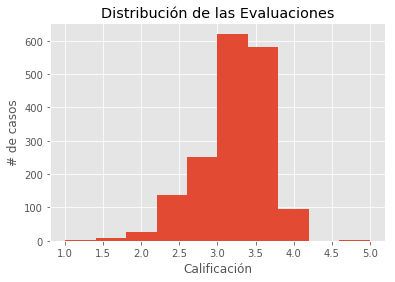

In [41]:
# hay pocos valores anomalos
df['rating'].hist()
plt.xlabel('Calificación')
plt.ylabel('# de casos')
plt.title('Distribución de las Evaluaciones')
plt.figsize=(5, 5)
plt.show()

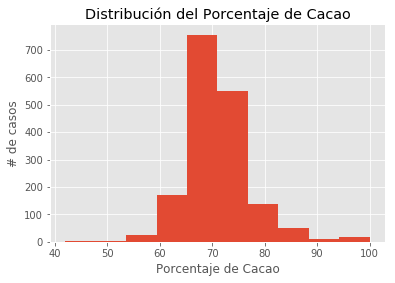

In [44]:
# hay pocos valores anomalos
df['cocoa_percent'].hist()
plt.xlabel('Porcentaje de Cacao')
plt.title('Distribución del Porcentaje de Cacao')
plt.ylabel('# de casos')
plt.figsize=(5, 5)
plt.show()

### Analisis descriptivo

In [251]:
df.head()

,maker,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
892,kallari (ecuatoriana),diego/ original micro,248,2008,85.0,ecuador,2.50,unknown,ecuador
1699,valrhona,guanaja,63,2006,70.0,france,4.00,"criollo, trinitario",south america
954,l'amourette,rugoso,1784,2016,80.0,u.s.a.,3.50,trinitario,nicaragua
29,aequare (gianduja),"los rios, quevedo, arriba",370,2009,55.0,ecuador,2.75,forastero (arriba),ecuador
533,devries,costa rica,166,2007,77.0,u.s.a.,3.50,trinitario,costa rica


In [252]:
df.describe()

,ref,review_date,cocoa_percent,rating
count,1721.000000,1721.000000,1721.000000,1721.000000
mean,1052.052876,2012.416618,71.716734,3.196107
std,547.600194,2.875951,6.122141,0.460860
min,5.000000,2006.000000,42.000000,1.000000
25%,607.000000,2010.000000,70.000000,3.000000
50%,1089.000000,2013.000000,70.000000,3.250000
75%,1514.000000,2015.000000,75.000000,3.500000
max,1952.000000,2017.000000,100.000000,5.000000


In [45]:
df.describe(include=['object'])

,maker,specific_origin,company_location,bean_type,broad_origin
count,1721,1721,1721,1721,1721
unique,409,981,60,41,82
top,soma,madagascar,u.s.a.,unknown,venezuela
freq,46,56,737,837,226


In [46]:
# las 5 empresas mas productoras
df['maker'].value_counts().head()

soma        46
bonnat      26
fresco      26
pralus      25
a. morin    23
Name: maker, dtype: int64

In [47]:
# se puede ver una alta correlacion entre la ref y el review date
# para las demas variables las correlaciones son bajas
# la mas alta para cocoa_percent es el rating, entre mas cocoa el rating comienza a disminuir
df.corr()

,ref,review_date,cocoa_percent,rating
ref,1.000000,0.985266,0.038406,0.080073
review_date,0.985266,1.000000,0.040437,0.075401
cocoa_percent,0.038406,0.040437,1.000000,-0.146180
rating,0.080073,0.075401,-0.146180,1.000000


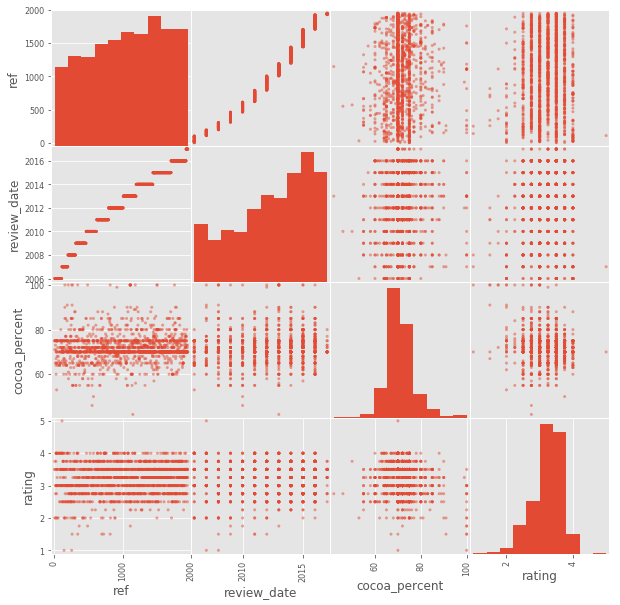

In [58]:
pd.plotting.scatter_matrix(df)
plt.rcParams["figure.figsize"] = [5, 5]
plt.show()

In [62]:
df['review_date'].value_counts()

2015    281
2014    237
2016    215
2012    188
2013    181
2011    157
2009    113
2010    109
2008     90
2007     69
2006     57
2017     24
Name: review_date, dtype: int64

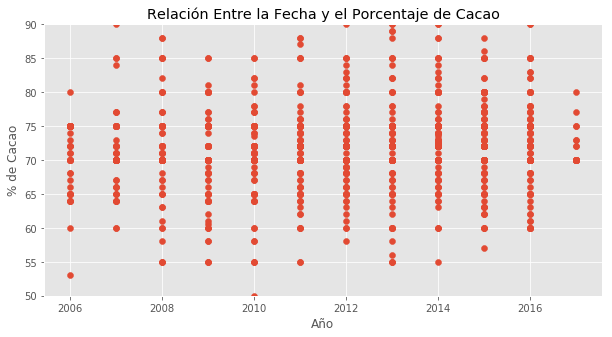

In [67]:
# parece haber una relacion sinoidal entre la fecha de revision y la cantidad de cacao
plt.figure(figsize=(10, 5))
plt.scatter(df['review_date'], df['cocoa_percent'])
plt.ylabel('% de Cacao')
plt.xlabel('Año')
plt.ylim(50, 90)
plt.title('Relación Entre la Fecha y el Porcentaje de Cacao')
plt.show()

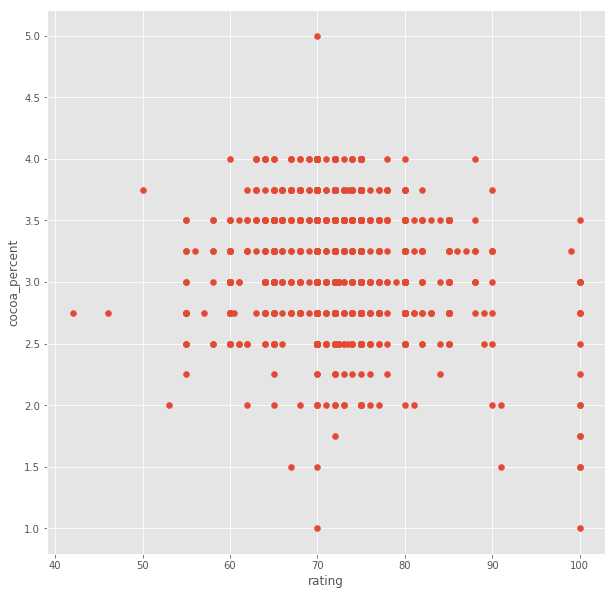

In [258]:
# existe cierta tendencia de que a medida que 
plt.figure(figsize=(10, 10))
plt.scatter(df['cocoa_percent'], df['rating'])
plt.xlabel('rating')
plt.ylabel('cocoa_percent')
plt.show()

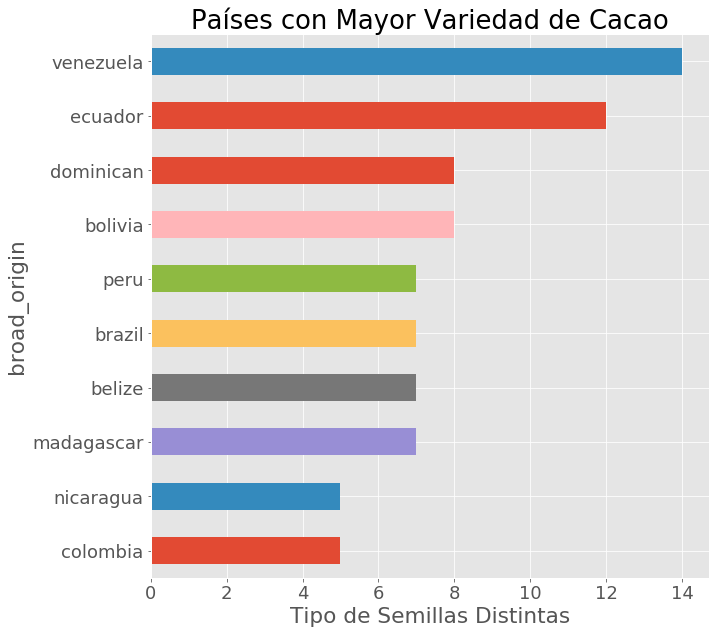

In [78]:
# el pais con mayor variedad de cacao
plt.rcParams.update({'font.size' : 18})
plt.figure(figsize=(10,10))
plt.title('Países con Mayor Variedad de Cacao')
plt.xlabel('Tipo de Semillas Distintas')
plt.ylabel(' ')
df.groupby(["broad_origin"]).nunique()['bean_type'].sort_values(ascending=False)[0:10].sort_values().plot(kind='barh')

In [260]:
# los primeros 5 origenes con mejor rating
first_compound_countries = df.groupby(["broad_origin"]).mean()['rating'].sort_values(ascending=False).index[0:5].tolist()
first_compound_countries

['peru, dom. rep',
 'peru, belize',
 'dr, ecuador, peru',
 'png, vanuatu, mad',
 'south america']

In [261]:
first_countries = set(np.concatenate([
    np.array(country.split(','))
    for country in first_compound_countries
]))
list(first_countries)

['south america',
 ' peru',
 'peru',
 ' belize',
 ' vanuatu',
 'png',
 'dr',
 ' ecuador',
 ' dom. rep',
 ' mad']

In [262]:
# we can say that in general south america produces the highest ranking chocolate
for country in first_countries:
    print(country, df[df["broad_origin"] == country.strip()]['rating'].mean())

south america 3.6666666666666665
 peru 3.1378787878787877
peru 3.1378787878787877
 belize 3.2346938775510203
 vanuatu 3.25
png nan
dr nan
 ecuador 3.134715025906736
 dom. rep nan
 mad nan


In [94]:
# el fabricante con mayor variedad de cacao
variedad_fabricante = np.array(df.groupby(["maker"]).nunique()['bean_type'].sort_values(ascending=False).index[:10])
variedad_fabricante

array(['soma', 'coppeneur', 'domori', 'pralus', 'valrhona', 'bonnat',
       'pierre marcolini', 'felchlin', 'fresco', 'fruition'], dtype=object)

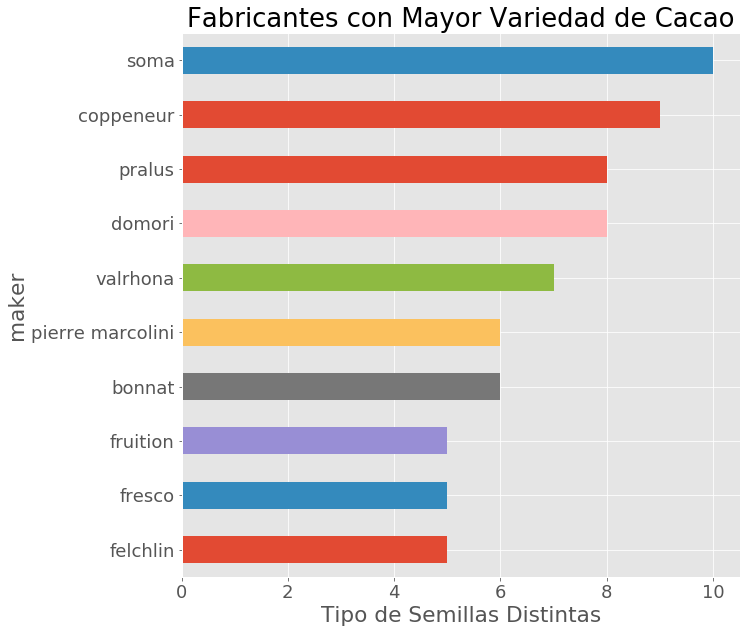

In [185]:
# el pais con mayor variedad de cacao
plt.rcParams.update({'font.size' : 18})
plt.figure(figsize=(10,10))
plt.title('Fabricantes con Mayor Variedad de Cacao')
plt.xlabel('Tipo de Semillas Distintas')
plt.ylabel(' ')
df.groupby(["maker"]).nunique()['bean_type'].sort_values(ascending=False)[0:10].sort_values().plot(kind='barh')

In [264]:
# soma es una empresa canadiense que obtiene cacao de diversas fuentes del mundo pero especificamente sudamerica
df[df['maker'] == 'soma'][['broad_origin', 'company_location']]['broad_origin'].unique()

array(['dominican', 'mad., java, png', 'indonesia', 'peru', 'ecuador',
       'jamaica', 'venezuela', 'papua new guinea', 'bolivia', 'vanuatu',
       'nicaragua', 'madagascar', 'grenada', 'ghana', 'vietnam',
       'trinidad', 'guatemala', 'brazil', 'hawaii',
       'madagascar & ecuador', 'haiti', 'peru, dom. rep',
       'dr, ecuador, peru'], dtype=object)

In [101]:
# el fabricante con mejor rating promedio
rating_fabricante = np.array(df.groupby(["maker"]).mean()['rating'].sort_values(ascending=False).index[:5]) 
rating_fabricante

array(['tobago estate (pralus)', 'ocelot',
       'heirloom cacao preservation (zokoko)', 'matale', 'patric'], dtype=object)

In [102]:
rating_fabricante, variedad_fabricante

(array(['tobago estate (pralus)', 'ocelot',
        'heirloom cacao preservation (zokoko)', 'matale', 'patric'], dtype=object),
 array(['soma', 'coppeneur', 'domori', 'pralus', 'valrhona', 'bonnat',
        'pierre marcolini', 'felchlin', 'fresco', 'fruition'], dtype=object))

In [103]:
# bonnat y valrhona tienen mayor variedad y mejor calificacion
np.intersect1d(rating_fabricante, variedad_fabricante)

array([], dtype=object)

In [229]:
df[df['maker'] == 'soma'].shape

(46, 9)

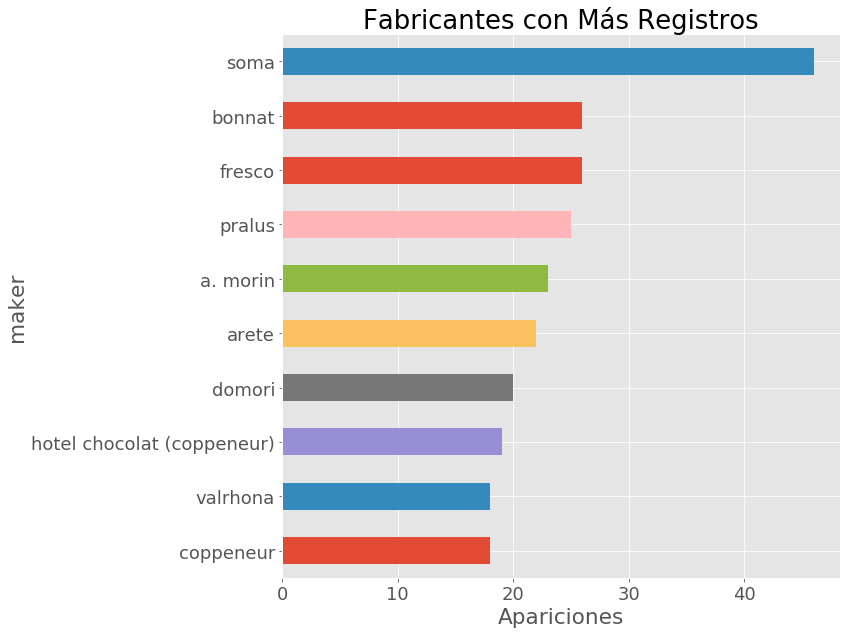

In [228]:
# el pais con mayor variedad de cacao
plt.rcParams.update({'font.size' : 18})
plt.figure(figsize=(10,10))
plt.title('Fabricantes con Más Registros')
plt.xlabel('Apariciones')
plt.ylabel(' ')
df.groupby(["maker"])['rating'].count().sort_values(ascending=False)[0:10].sort_values().plot(kind='barh')

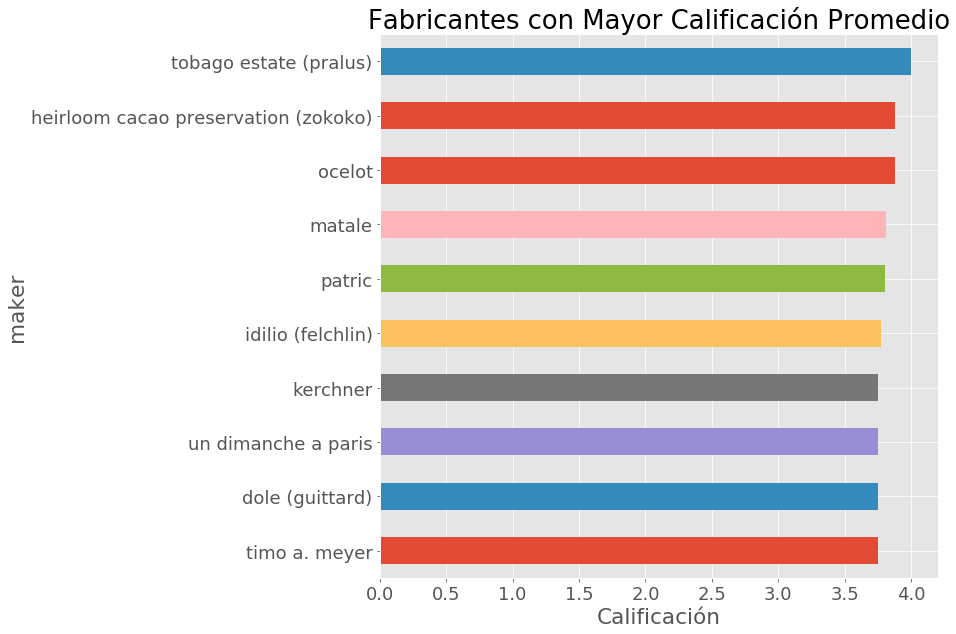

In [211]:
# el pais con mayor variedad de cacao
plt.rcParams.update({'font.size' : 18})
plt.figure(figsize=(10,10))
plt.title('Fabricantes con Mayor Calificación Promedio')
plt.xlabel('Calificación')
plt.ylabel(' ')
df.groupby(["maker"])['rating'].mean().sort_values(ascending=False)[0:10].sort_values().plot(kind='barh')

In [116]:
cacao_percent = np.array(df.groupby(["maker"]).mean()['cocoa_percent'].sort_values(ascending=False)[0:10].sort_values().index)
cacao_percent

array(['peppalo', 'durand', 'blanxart', 'claudio corallo',
       'vintage plantations (tulicorp)', 'garden island', 'nanea',
       'dolfin (belcolade)', 'bouga cacao (tulicorp)',
       'chocolate alchemist-philly'], dtype=object)

In [118]:
np.intersect1d(rating_fabricante, variedad_fabricante)
np.intersect1d(cacao_percent, variedad_fabricante)

array([], dtype=object)

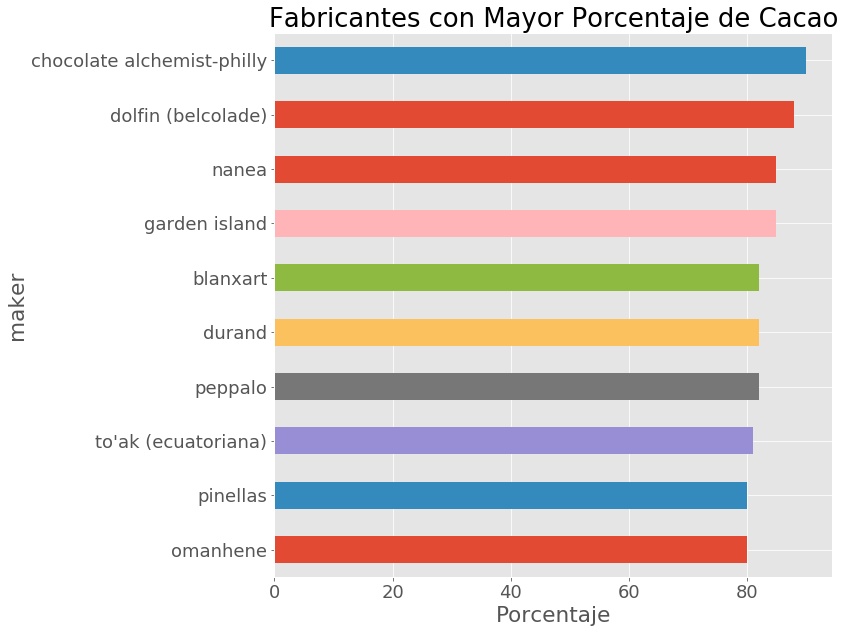

In [199]:
# el pais con mayor variedad de cacao
plt.rcParams.update({'font.size' : 18})
plt.figure(figsize=(10,10))
plt.title('Fabricantes con Mayor Porcentaje de Cacao')
plt.xlabel('Porcentaje')
plt.ylabel(' ')
df.groupby(["maker"]).min()['cocoa_percent'].sort_values(ascending=False)[0:10].sort_values().plot(kind='barh')

In [206]:
# pacari es una empresa ecuatoriana que obtiene cacao de diversas fuentes del mundo pero especificamente sudamerica
df[df['maker'] == 'pinellas'][['broad_origin', 'company_location', 'rating']]

,broad_origin,company_location,rating
1295,honduras,u.s.a.,2.5


In [371]:
# obtiene el cacao de sudamerica
df[df['maker'] == 'pacari'][['broad_origin', 'company_location']]['broad_origin'].unique()

array(['ecuador', 'peru', 'colombia'], dtype=object)

In [372]:
ratings_in_time = df.groupby('review_date').mean()['rating']
ratings_in_time

review_date
2006    3.271930
2007    3.202899
2008    2.980556
2009    3.070796
2010    3.160550
2011    3.256369
2012    3.196809
2013    3.193370
2014    3.198312
2015    3.244662
2016    3.226744
2017    3.312500
Name: rating, dtype: float64

In [373]:
ratings = ratings_in_time.values
years = ratings_in_time.index

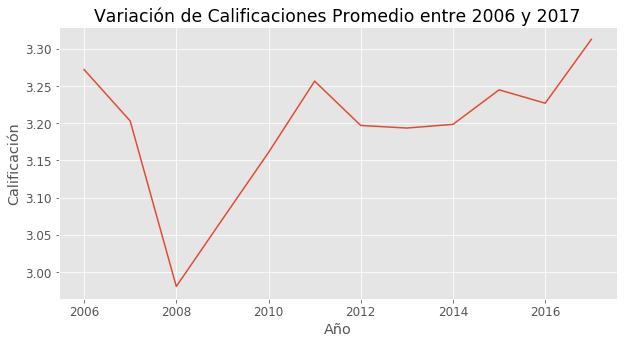

In [488]:
# en general losr ratings de los chocolates se han mantenido entre 3 y 3.30
plt.figure(figsize=(10, 5))
plt.title('Variación de Calificaciones Promedio entre 2006 y 2017')
plt.xlabel('Año')
plt.ylabel('Calificación')
plt.plot(years, ratings)
plt.show()

In [375]:
# crecimiento porcentual aproximado desde 2008 hasta 20017
(3.3 - 2.7) / 3.3

0.1818181818181817

In [212]:
rating_fabricante

array(['tobago estate (pralus)', 'ocelot',
       'heirloom cacao preservation (zokoko)', 'matale', 'patric'], dtype=object)

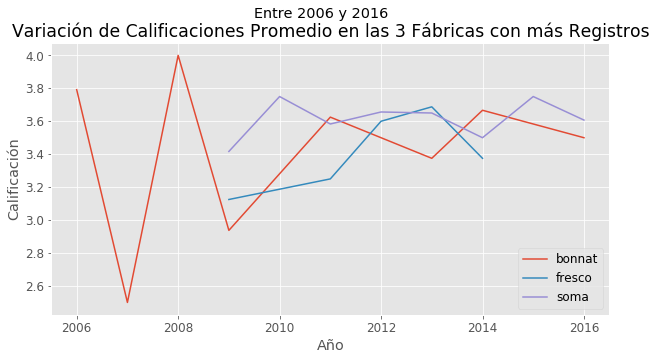

In [490]:
best_ratings_time = df.loc[df['maker'].isin(['soma','bonnat', 'fresco'])].groupby(['maker', 'review_date']).mean()['rating']
best_ratings_time = best_ratings_time.reset_index()
best_ratings_time;

# al rededor del 2009 las 3 fabricas tenian un nivel bajo de rating
plt.rcParams.update({'font.size' : 12})
plt.xlabel('year')
#best_ratings_time.index.name = 'Año'
best_ratings_time.set_index('review_date', inplace=True)
ax = best_ratings_time.groupby('maker')['rating'].plot(legend=True, figsize=(10,5), sharex=True)
plt.title('Variación de Calificaciones Promedio en las 3 Fábricas con más Registros')
plt.suptitle('Entre 2006 y 2016')
plt.xlabel('Año')
plt.ylabel('Calificación')
plt.show()

In [459]:
df.loc[df['maker'].isin(['soma','bonnat', 'fresco'])].groupby(['maker', 'review_date'])['broad_origin'].unique().reset_index()

,maker,review_date,broad_origin
0,bonnat,2006,"[venezuela, sri lanka, carribean, madagascar]"
1,bonnat,2007,[ecuador]
2,bonnat,2008,[venezuela]
3,bonnat,2009,"[ivory coast, mexico, peru]"
4,bonnat,2011,"[peru, jamaica, madagascar, haiti, brazil, cuba]"
5,bonnat,2013,"[gabon, brazil]"
6,bonnat,2014,"[venezuela, dominican, brazil]"
7,bonnat,2016,[mexico]
8,fresco,2009,"[jamaica, venezuela]"
9,fresco,2011,"[venezuela, dominican, jamaica, madagascar, gh..."


In [487]:
best_ratings_borigin = df.loc[
    df['maker'].isin(['soma','bonnat', 'fresco'])
].groupby(['maker', 'review_date'])['broad_origin'].nunique().reset_index()
best_ratings_borigin

,maker,review_date,broad_origin
0,bonnat,2006,4
1,bonnat,2007,1
2,bonnat,2008,1
3,bonnat,2009,3
4,bonnat,2011,6
5,bonnat,2013,2
6,bonnat,2014,3
7,bonnat,2016,1
8,fresco,2009,2
9,fresco,2011,5


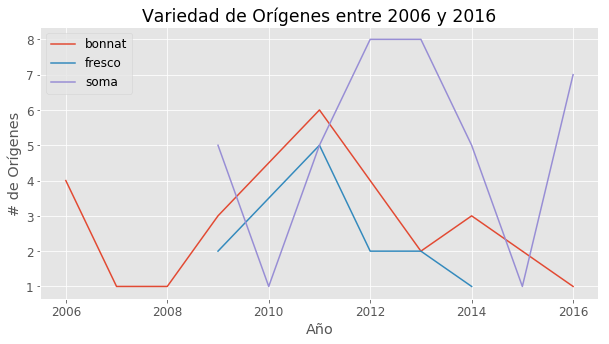

In [486]:
best_ratings_borigin = df.loc[
    df['maker'].isin(['soma','bonnat', 'fresco'])
].groupby(['maker', 'review_date'])['broad_origin'].nunique().reset_index()
best_ratings_borigin;

# al rededor del 2009 las 3 fabricas tenian un nivel bajo de rating
plt.xlabel('year')
best_ratings_borigin.set_index('review_date', inplace=True)
ax = best_ratings_borigin.groupby('maker')['broad_origin'].plot(legend=True, figsize=(10,5))
plt.title('Variedad de Orígenes entre 2006 y 2016')
plt.xlabel('Año')
plt.ylabel('# de Orígenes')
plt.show()

In [468]:
df[df['maker'] == 'soma']['broad_origin'].nunique()

23

In [282]:
# restamos 1 por el tipo unknown
best_ratings_variety = df.loc[df['maker'].isin(['pacari','artisan du chocolat', 'bonnat'])].groupby(['maker', 'review_date'])['bean_type'].nunique().apply(lambda x: x - 1)#.sort_values(ascending=False)
best_ratings_variety

maker                review_date
artisan du chocolat  2008           0
                     2009           3
                     2010           1
                     2011           0
                     2012           0
                     2013           0
bonnat               2006           2
                     2007           0
                     2008           0
                     2009           1
                     2011           3
                     2013           0
                     2014           0
                     2016           0
pacari               2008           0
                     2011           0
                     2012           0
                     2014           0
                     2016           0
Name: bean_type, dtype: int64

In [283]:
ratings_origin = df.groupby(['maker', 'rating', 'cocoa_percent'])['specific_origin', 'broad_origin'].nunique().apply(lambda x : x-1)
ratings_origin.reset_index(inplace=True)
ratings_origin

,maker,rating,cocoa_percent,specific_origin,broad_origin
0,a. morin,2.75,70.0,3,3
1,a. morin,3.00,70.0,2,2
2,a. morin,3.25,70.0,2,2
3,a. morin,3.50,70.0,5,4
4,a. morin,3.75,63.0,1,1
5,a. morin,3.75,70.0,1,1
6,a. morin,4.00,63.0,0,0
7,a. morin,4.00,70.0,1,1
8,acalli,3.75,70.0,1,0
9,adi,2.75,60.0,0,0


In [284]:
ratings_origin.corr()

,rating,cocoa_percent,specific_origin,broad_origin
rating,1.000000,-0.154498,0.129424,0.110038
cocoa_percent,-0.154498,1.000000,-0.052352,-0.052088
specific_origin,0.129424,-0.052352,1.000000,0.939831
broad_origin,0.110038,-0.052088,0.939831,1.000000


In [331]:
aggregation = ratings_origin.groupby('maker').agg(
    {'specific_origin':['sum', 'max'],
     'rating':['mean', 'var', 'max', 'min'], 
     'cocoa_percent': lambda x: x.max() - x.min()
    }
)
aggregation.reset_index(inplace=True)
aggregation.columns = ['maker', 'rating_mean', 'rating_var', 'rating_max', 'rating_min', 'cocoa_percent', 'so_sum', 'so_max']

In [332]:
aggregation.sort_values('rating_mean', ascending=False).dropna().head(10)

,maker,rating_mean,rating_var,rating_max,rating_min,cocoa_percent,so_sum,so_max
179,heirloom cacao preservation (zokoko),3.8750,0.031250,4.00,3.75,4.0,0,0
284,ocelot,3.8750,0.031250,4.00,3.75,5.0,0,0
13,amedei,3.8500,0.550000,5.00,3.00,0.0,4,1
32,benoit nihant,3.8125,0.057292,4.00,3.50,2.0,2,2
246,matale,3.8125,0.057292,4.00,3.50,6.0,0,0
302,patric,3.8000,0.075000,4.00,3.50,8.0,0,0
189,idilio (felchlin),3.7500,0.100000,4.00,3.25,4.0,4,3
198,just good chocolate,3.7500,0.125000,4.00,3.50,0.0,1,1
79,chocola'te,3.7500,0.000000,3.75,3.75,2.0,0,0
227,madecasse (cinagra),3.6875,0.057292,4.00,3.50,12.0,0,0


In [289]:
df[df['review_date'] == 2006].nlargest(15, 'rating')

,maker,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
242,bonnat,"ocumare, puerto cabello",32,2006,75.0,france,4.00,unknown,venezuela
1294,pierre marcolini,"ocumare, puerto cabello, venezuela",93,2006,72.0,belgium,4.00,criollo,venezuela
1330,pralus,jamaique,32,2006,75.0,france,4.00,trinitario,jamaica
1119,michel cluizel,maralumi p.,24,2006,64.0,france,4.00,unknown,papua new guinea
1118,michel cluizel,mangaro p.,24,2006,65.0,france,4.00,trinitario,madagascar
1117,michel cluizel,los ancones p.,24,2006,67.0,france,4.00,unknown,dominican
1425,santander (compania nacional),colombian dark,32,2006,70.0,colombia,4.00,forastero (nacional),colombia
1699,valrhona,guanaja,63,2006,70.0,france,4.00,"criollo, trinitario",south america
649,felchlin,"alto beni, cru savage",56,2006,68.0,switzerland,4.00,criollo (wild),bolivia
1292,pierre marcolini,"porcelana, tabasco, limited ed.",81,2006,72.0,belgium,4.00,criollo,mexico


In [333]:
maker_rating_mean = df.groupby(['review_date', 'maker'])['rating'].mean().reset_index()
maker_rating_mean

,review_date,maker,rating
0,2006,bonnat,3.791667
1,2006,domori,3.250000
2,2006,el rey,2.750000
3,2006,felchlin,3.300000
4,2006,guittard,3.125000
5,2006,jacque torres,2.000000
6,2006,michel cluizel,3.750000
7,2006,neuhaus (callebaut),2.583333
8,2006,original hawaiin chocolate factory,3.000000
9,2006,pierre marcolini,3.666667


In [339]:
best_maker_indexes = maker_rating_mean.groupby(['review_date'])['rating'].nlargest(2).reset_index()['level_1'].values
best_makers_year = maker_rating_mean.iloc[best_maker_indexes]
best_makers_year.columns = ['Fecha de Revisión', 'Fabricante', 'Calificación']
best_makers_year.reset_index().drop(['index'], axis=1)

,Fecha de Revisión,Fabricante,Calificación
0,2006,bonnat,3.791667
1,2006,michel cluizel,3.750000
2,2007,patric,4.000000
3,2007,pralus,4.000000
4,2008,bonnat,4.000000
5,2008,artisan du chocolat,3.750000
6,2009,cacao sampaka,4.000000
7,2009,scharffen berger,3.833333
8,2010,claudio corallo,3.750000
9,2010,potomac,3.750000


In [340]:
# agrupamos por segmentos en base al rating, pudimos haber usado un algoritmo de clustering pero esto sera suficiente
makers = {str(i) : df[(df['rating'] >= i) & (df['rating'] < i + 1)].sort_values('rating') for i in range(1,6)}

In [341]:
# el mejor de toda la muestra
makers['5']

,maker,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
78,amedei,chuao,111,2007,70.0,italy,5.0,trinitario,venezuela


In [346]:
# los peores de toda la muestra
makers['1'].reset_index().drop('index', axis=1)

,maker,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
0,callebaut,baking,141,2007,70.0,belgium,1.00,unknown,ecuador
1,claudio corallo,principe,252,2008,100.0,sao tome,1.00,forastero,sao tome & principe
2,machu picchu trading co.,peru,721,2011,70.0,peru,1.50,unknown,peru
3,bouga cacao (tulicorp),"el oro, hacienda de oro",341,2009,100.0,ecuador,1.50,forastero (arriba),ecuador
4,cacaoyere (ecuatoriana),pichincha,259,2008,91.0,ecuador,1.50,forastero (arriba),ecuador
5,coppeneur,ecuador puristique,817,2012,100.0,germany,1.50,unknown,ecuador
6,snake & butterfly,ghana,693,2011,67.0,u.s.a.,1.50,forastero,ghana
7,artisan du chocolat,venezuela,486,2010,100.0,u.k.,1.75,unknown,venezuela
8,hotel chocolat,"island growers, 2012, 120hr c.",1113,2013,100.0,u.k.,1.75,trinitario,st lucia
9,artisan du chocolat,brazil rio doce,363,2009,72.0,u.k.,1.75,unknown,brazil


In [347]:
cocoa_rating = [(str(i), makers[str(i)]['cocoa_percent'].mean()) for i in range(1, 6)]
cocoa_rating

[('1', 87.0),
 ('2', 72.42718446601941),
 ('3', 71.41971713810317),
 ('4', 70.8125),
 ('5', 70.0)]

In [348]:
df_percent = pd.DataFrame(cocoa_rating, columns=['rating', 'cocoa_percent'])#.plot(x='', kind='bar', figsize=(5, 5))
df_percent

,rating,cocoa_percent
0,1,87.000000
1,2,72.427184
2,3,71.419717
3,4,70.812500
4,5,70.000000


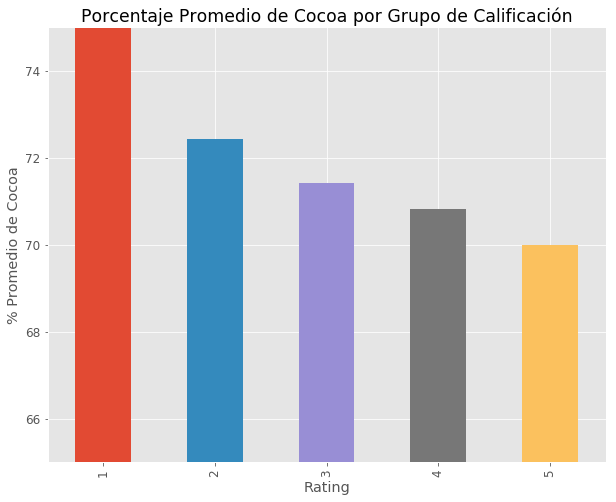

In [491]:
# se ve como a medida que baja el % de cocoa el rating mejora 
df_percent.set_index('rating', inplace=True)
df_percent['cocoa_percent'].plot.bar(figsize=(10, 8))
plt.title('Porcentaje Promedio de Cocoa por Grupo de Calificación')
plt.xlabel('Rating')
plt.ylabel('% Promedio de Cocoa')
plt.ylim(65, 75);

In [443]:
clocation_stats_info = [makers[str(i)]['maker'].describe() for i in range(1, 6)]
df_desc = [pd.DataFrame(info) for info in clocation_stats_info]
maker = pd.concat([df for df in df_desc], axis=1)
maker.columns = ['Calificación ' + str(i) for i in range(1, 6)]
maker.index = ['cantidad', 'unicos', 'moda', 'moda frec.']
maker

,Calificación 1,Calificación 2,Calificación 3,Calificación 4,Calificación 5
cantidad,10,412,1202,96,1
unicos,9,234,341,45,1
moda,artisan du chocolat,hotel chocolat (coppeneur),soma,soma,amedei
moda frec.,2,7,34,10,1


In [444]:
clocation_stats_info = [makers[str(i)]['specific_origin'].describe() for i in range(1, 6)]
df_desc = [pd.DataFrame(info) for info in clocation_stats_info]
specific_origin = pd.concat([df for df in df_desc], axis=1)
specific_origin.columns = ['Calificación ' + str(i) for i in range(1, 6)]
specific_origin.index = ['cantidad', 'unicos', 'moda', 'moda frec.']
specific_origin

,Calificación 1,Calificación 2,Calificación 3,Calificación 4,Calificación 5
cantidad,10,412,1202,96,1
unicos,10,272,735,85,1
moda,venezuela,peru,madagascar,madagascar,chuao
moda frec.,1,21,42,5,1


In [448]:
clocation_stats_info = [makers[str(i)]['review_date'].describe() for i in range(1, 6)]
df_desc = [pd.DataFrame(info) for info in clocation_stats_info]
review_date = pd.concat([df for df in df_desc], axis=1)
review_date.columns = ['Calificación ' + str(i) for i in range(1, 6)]
review_date.index = ['cantidad', 'media', 'std', 'min', '25%', '50%', '75%', 'valr max.']
review_date

,Calificación 1,Calificación 2,Calificación 3,Calificación 4,Calificación 5
cantidad,10.000000,412.000000,1202.000000,96.000000,1.0
media,2009.800000,2012.296117,2012.595674,2011.020833,2007.0
std,1.932184,2.842103,2.815074,3.286269,NaN
min,2007.000000,2006.000000,2006.000000,2006.000000,2007.0
25%,2008.250000,2010.000000,2011.000000,2007.750000,2007.0
50%,2009.500000,2013.000000,2013.000000,2011.000000,2007.0
75%,2011.000000,2015.000000,2015.000000,2013.000000,2007.0
valr max.,2013.000000,2017.000000,2017.000000,2016.000000,2007.0


In [449]:
clocation_stats_info = [makers[str(i)]['cocoa_percent'].describe() for i in range(1, 6)]
df_desc = [pd.DataFrame(info) for info in clocation_stats_info]
cocoa_percent = pd.concat([df for df in df_desc], axis=1)
cocoa_percent.columns = ['Calificación ' + str(i) for i in range(1, 6)]
cocoa_percent.index = ['cantidad', 'media', 'std', 'min', '25%', '50%', '75%', 'valr max.']
cocoa_percent

,Calificación 1,Calificación 2,Calificación 3,Calificación 4,Calificación 5
cantidad,10.000000,412.000000,1202.000000,96.000000,1.0
media,87.000000,72.427184,71.419717,70.812500,70.0
std,15.143756,7.529797,5.394357,3.867033,NaN
min,67.000000,42.000000,50.000000,60.000000,70.0
25%,70.500000,70.000000,70.000000,70.000000,70.0
50%,95.500000,72.000000,70.000000,70.000000,70.0
75%,100.000000,75.000000,74.000000,72.250000,70.0
valr max.,100.000000,100.000000,100.000000,88.000000,70.0


In [431]:
clocation_stats_info = [makers[str(i)]['company_location'].describe() for i in range(1, 6)]
df_desc = [pd.DataFrame(info) for info in clocation_stats_info]
company_loc = pd.concat([df for df in df_desc], axis=1)
company_loc.columns = ['Segmento ' + str(i) for i in range(1, 6)]
company_loc

,Segmento 1,Segmento 2,Segmento 3,Segmento 4,Segmento 5
count,10,412,1202,96,1
unique,7,47,53,17,1
top,u.k.,u.s.a.,u.s.a.,u.s.a.,italy
freq,3,196,515,25,1


In [450]:
clocation_stats_info = [makers[str(i)]['bean_type'].describe() for i in range(1, 6)]
df_desc = [pd.DataFrame(info) for info in clocation_stats_info]
bean_type = pd.concat([df for df in df_desc], axis=1)
bean_type.columns = ['Calificación ' + str(i) for i in range(1, 6)]
bean_type.index = ['cantidad', 'unicos', 'moda', 'moda frec.']
bean_type

,Calificación 1,Calificación 2,Calificación 3,Calificación 4,Calificación 5
cantidad,10,412,1202,96,1
unicos,4,14,39,15,1
moda,unknown,unknown,unknown,unknown,trinitario
moda frec.,5,228,571,33,1


In [451]:
clocation_stats_info = [makers[str(i)]['broad_origin'].describe() for i in range(1, 6)]
df_desc = [pd.DataFrame(info) for info in clocation_stats_info]
broad_origin = pd.concat([df for df in df_desc], axis=1)
broad_origin.columns = ['Calificación ' + str(i) for i in range(1, 6)]
broad_origin.index = ['cantidad', 'unicos', 'moda', 'moda frec.']
broad_origin

,Calificación 1,Calificación 2,Calificación 3,Calificación 4,Calificación 5
cantidad,10,412,1202,96,1
unicos,7,54,73,26,1
moda,ecuador,peru,venezuela,venezuela,venezuela
moda frec.,4,53,153,22,1


In [457]:
borigin_stats_info = [(str(i), makers[str(i)]['broad_origin'].nunique()) for i in range(1, 6)]
[print(info, '\n\n\n') for info in borigin_stats_info];

('1', 10) 



('2', 272) 



('3', 735) 



('4', 85) 



('5', 1) 





In [455]:
df_origin = pd.DataFrame(borigin_stats_info, columns=['rating', 'origin'])
df_origin

,rating,origin
0,1,7
1,2,54
2,3,73
3,4,26
4,5,1


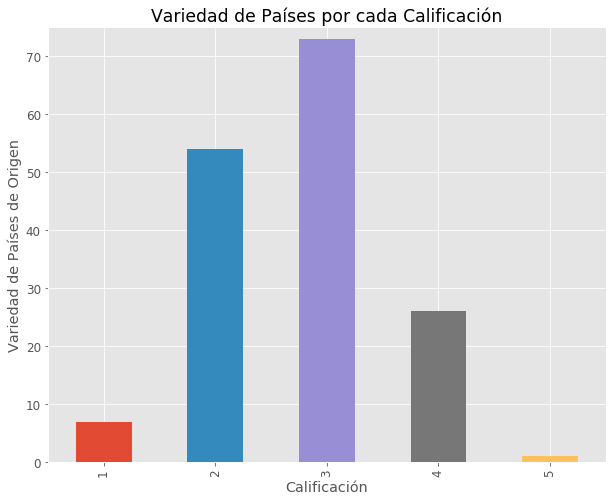

In [456]:
df_origin.set_index('rating', inplace=True)
df_origin['origin'].plot.bar(figsize=(10, 8))
plt.title('Variedad de Países por cada Calificación')
plt.xlabel('Calificación')
plt.ylabel('Variedad de Países de Origen')
plt.ylim(0, 75);

In [594]:
# correlacionado a lo anterior esta el origen especifico
sorigin_stats_info = [(str(i), makers[str(i)]['specific_origin'].nunique()) for i in range(1, 6)]
[print(info, '\n\n\n') for info in sorigin_stats_info];

('1', 10) 



('2', 272) 



('3', 735) 



('4', 85) 



('5', 1) 





In [610]:
df_sorigin = pd.DataFrame(sorigin_stats_info, columns=['rating', 'sorigin'])

,rating,sorigin
0,1,10
1,2,272
2,3,735
3,4,85
4,5,1


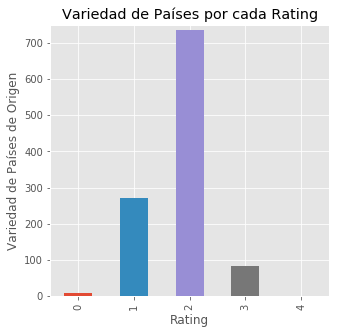

In [617]:
# se ve como a medida que baja el % de cocoa el rating mejora 
df_sorigin['sorigin'].plot.bar(figsize=(5, 5))
plt.title('Variedad de Países por cada Rating')
plt.xlabel('Rating')
plt.ylabel('Variedad de Países de Origen')
plt.ylim(0, 750);

In [618]:
df.to_csv('cocoa_ratings_clean.csv')

In [279]:
# porcentages de las diferencias

In [280]:

# checar think stats
# entender cada variable
# limpieza
# caracteristicas del dataset
# outliers
# distribuciones
# http://flavorsofcacao.com/chocolate_database.html
